In [5]:
import tensorflow.keras as keras
keras.__version__

'2.7.0'

In [6]:
import os
original_dataset_dir = 'E:/data/Dogs vs. Cats/train'
base_dir = 'E:/data/Dogs vs. Cats/my-train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\machengjun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
100/100 [==============================] - 12s 81ms/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6731 - val_acc: 0.5880
Epoch 2/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6793 - acc: 0.5635 - val_loss: 0.6615 - val_acc: 0.6010
Epoch 3/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6693 - acc: 0.5840 - val_loss: 0.6489 - val_acc: 0.5900
Epoch 4/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6555 - acc: 0.6110 - val_loss: 0.6510 - val_acc: 0.6080
Epoch 5/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6412 - acc: 0.6105 - val_loss: 0.6425 - val_acc: 0.6160
Epoch 6/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6322 - acc: 0.6335 - val_loss: 0.6316 - val_acc: 0.6230
Epoch 7/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6180 - acc: 0.6455 - val_loss: 0.5885 - val_acc: 0.6750
Epoch 8/100
100/100 [==============================] - 8s 80m

In [13]:
model.save('cats_and_dogs_small_2.h5')

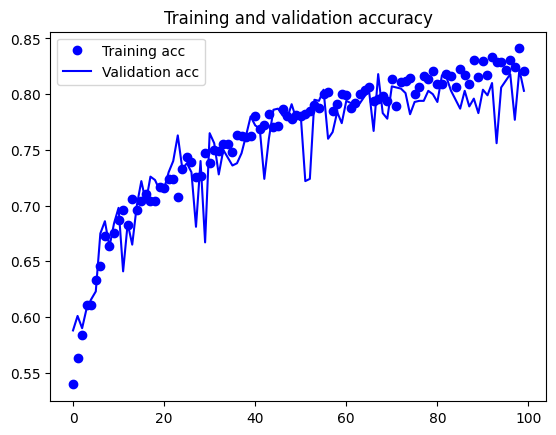

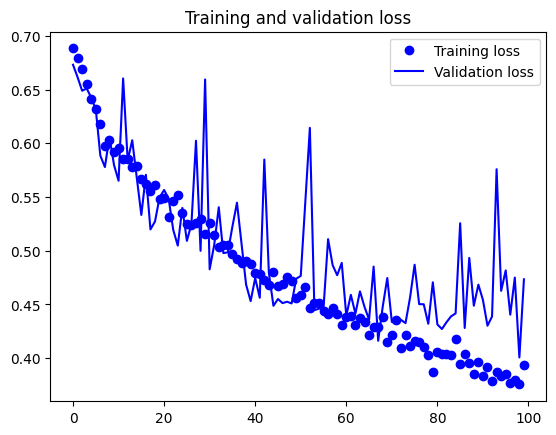

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()